In [1]:
import feature_attribution_testing
import os
import matplotlib.pyplot as plt
import torch
torch.cuda.is_available()

False

# 1. Create Data Attribution

In [2]:
'''
dataset = 'MNIST'
model = 'basic_conv'
xai_method = 'representer'
os.system(f"python explain.py --config_file ../config_files/explain/{dataset}/{model}_std_{xai_method}.yaml  ")
'''

'\ndataset = \'MNIST\'\nmodel = \'basic_conv\'\nxai_method = \'representer\'\nos.system(f"python explain.py --config_file ../config_files/explain/{dataset}/{model}_std_{xai_method}.yaml  ")\n'

# 2. Create LRP Heatmaps

In [3]:
model_name="basic_conv"
model_path="C:/Users/weckbecker/DualView/checkpoints/MNIST/std/basic_conv_std/MNIST_basic_conv"
device="cuda" if torch.cuda.is_available() else "cpu"
class_groups="NA"
dataset_name="MNIST"
dataset_type="std"
data_root="C:/Users/weckbecker/DualView/src/datasets"
xpl_root="C:/Users/weckbecker/DualView/explanations/MNIST/std/basic_conv_std/representer"
coef_root="C:/Users/weckbecker/DualView/explanations/MNIST/std/basic_conv_std/representer"
save_dir="C:/Users/weckbecker/DualView/test_output"
validation_size=2000
num_classes=10
imagenet_class_ids="NA"
testsplit="NA"
pages=1

c:\Users\weckbecker\DualView\src\datasets\MNIST.py:58: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.test_targets=torch.tensor(self.targets)[self.test_ids]


Validation ids:
tensor([7542, 8214, 3698,  ..., 7815, 7438, 3491])
Test ids:
tensor([5886,  911, 6853,  ..., 7126, 5089, 7716])


  0%|          | 0/125 [00:00<?, ?it/s]

100%|██████████| 125/125 [00:01<00:00, 95.26it/s]


torch.Size([320, 60000])
320
torch.Size([320, 60000])
320
torch.Size([320, 60000])
320
torch.Size([320, 60000])
320
torch.Size([320, 60000])
320
torch.Size([320, 60000])
320
torch.Size([320, 60000])
320
torch.Size([320, 60000])
320
torch.Size([320, 60000])
320
torch.Size([320, 60000])
320
torch.Size([320, 60000])
320
torch.Size([320, 60000])
320
torch.Size([320, 60000])
320
torch.Size([320, 60000])
320
torch.Size([320, 60000])
320
torch.Size([320, 60000])
320
torch.Size([320, 60000])
320
torch.Size([320, 60000])
320
torch.Size([320, 60000])
320
torch.Size([320, 60000])
320
torch.Size([320, 60000])
320
torch.Size([320, 60000])
320
torch.Size([320, 60000])
320
torch.Size([320, 60000])
320
torch.Size([320, 60000])
320
torch.Size([182, 60000])


c:\Users\weckbecker\DualView\.venv\Lib\site-packages\torch\_tensor.py:868: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")
c:\Users\weckbecker\DualView\src\feature_attribution_testing.py:1035: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


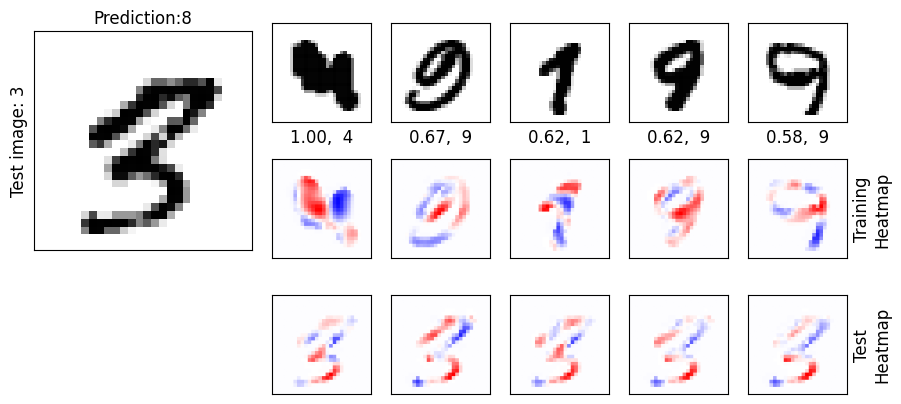

In [4]:
out = feature_attribution_testing.evaluate(model_name=model_name,
             model_path=model_path,
             device=device,
             class_groups=class_groups,
             dataset_name=dataset_name,
             dataset_type=dataset_type,
             data_root=data_root,
             xpl_root=xpl_root,
             #coef_root=train_config.get('coef_root', None),
             save_dir=save_dir,
             validation_size=validation_size,
             num_classes=num_classes,
             imagenet_class_ids=imagenet_class_ids,
             testsplit=testsplit,
             pages=pages
             )

xpl_list contains the test heatmaps (as three RBG-values per pixel) and test LRP-relevance (as one level per pixel) for all four training points

In [5]:
x, y, xpl_list = out
print(len(xpl_list))
print(xpl_list[0][0].shape)
print(xpl_list[0][1].shape)

5
torch.Size([28, 28, 3])
torch.Size([1, 28, 28])


# 3. PixelFlipping

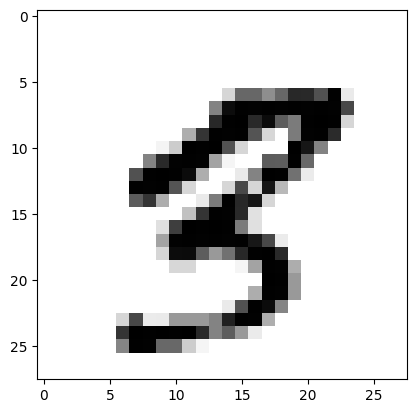

In [6]:
plt.close()
plt.imshow(x.squeeze(), cmap='gray_r')


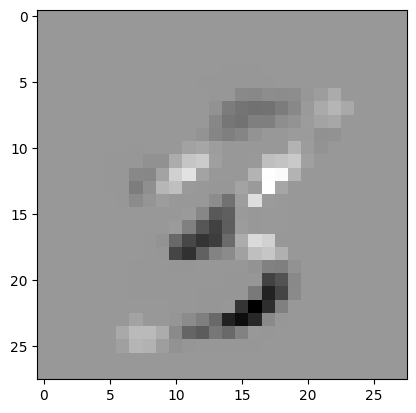

In [7]:
attr = xpl_list[0][1]
plt.close()
plt.imshow(attr.squeeze(), cmap='gray_r')

In [8]:
attr = attr.flatten()
idx_sorted = attr.argsort(descending=True)
attr = attr.reshape((1,28,28))

In [9]:
def pixel_flip(t, flatten_idx_list):
    t_size = t.size()
    t = t.flatten()
    for idx in flatten_idx_list:
        t[idx] = 1-t[idx]
    t = t.reshape(t_size)
    return t

def pixel_turn_off(t, flatten_idx_list):
    t_size = t.size()
    t = t.flatten()
    for idx in flatten_idx_list:
        t[idx] = 0
    t = t.reshape(t_size)
    return t

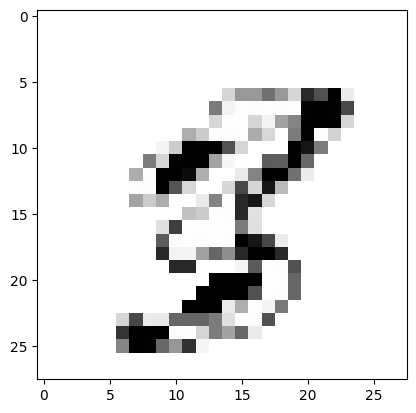

In [10]:
x_flip = pixel_flip(x.clone(), idx_sorted[:100])
plt.close()
plt.imshow(x_flip.squeeze(), cmap='gray_r')

In [28]:
F = 30
pixel_nr = 20
tensor_flip = torch.empty((F,1,28,28))
tensor_flip[0] = x.clone()
for i in range(1,F):
    tensor_flip[i] = pixel_flip(x.clone(), idx_sorted[:(pixel_nr)*(i)])

pixel_nr_turn_off = 5
tensor_turn_off = torch.empty((F,1,28,28))
tensor_turn_off[0] = x.clone()
for i in range(1,F):
    tensor_turn_off[i] = pixel_turn_off(x.clone(), idx_sorted[:(pixel_nr_turn_off)*(i)]) #turn off highest

tensor_turn_off_rev = torch.empty((F,1,28,28))
tensor_turn_off_rev[0] = x.clone()
for i in range(1,F):
    tensor_turn_off_rev[i] = pixel_turn_off(x.clone(), idx_sorted[-(pixel_nr_turn_off)*(i):]) #turn off lowest

In [29]:
# SAVE THESE AS FILE? OTHER POSSIBILITY TO CALCULATE TRAINING DATA ATTRIBUTION
from datasets import MNIST
mnist = MNIST(root="./datasets")

In [30]:
from torch.utils.data import Dataset
from torchvision import transforms

class PixelflipDataset(Dataset):

    def __init__(self, tensor, label):
        self.data = tensor
        self.label = label
        self.transform = mnist.transform
        self.inverse_transform = transforms.Normalize((0.1307,), (0.3081,))
        #mnist.inverse_transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img = self.data[idx]
        img = Image.fromarray(img.squeeze().numpy(), mode="F")

        if self.transform is not None:
            img = self.transform(img)

        return img, self.label
    
pixelflip_ds = PixelflipDataset(tensor_flip, y)
pixelturnoff_ds = PixelflipDataset(tensor_turn_off, y)
pixelturnoff_rev_ds = PixelflipDataset(tensor_turn_off_rev, y)

# 4. Calculate new Training Data Attribution

In [23]:
'''
from utils import xplain
from utils.models import load_model
from utils.data import load_datasets_reduced
from explain import load_explainer
from PIL import Image

ds_kwargs = {
    'data_root': data_root,
    'class_groups': class_groups,
    'image_set': "test",
    'validation_size': validation_size,
    "only_train": False,
    'imagenet_class_ids': imagenet_class_ids,
    'testsplit': testsplit
}

model = load_model(model_name="basic_conv", dataset_name="MNIST", num_classes=10).to(device)
train, _ = load_datasets_reduced(dataset_name="MNIST", dataset_type="std", kwparams=ds_kwargs)
explainer_cls, kwargs = load_explainer(xai_method="representer", model_path=model_path, save_dir="NA", dataset_name="MNIST")

xplain(
    model=model,
    train=train,
    test=pixelflip_ds,
    device=device,
    explainer_cls=explainer_cls,
    kwargs=kwargs,
    batch_size=32,
    num_batches_per_file=10,
    save_dir="C:/Users/weckbecker/DualView/explanations/MNIST/pixelflip/basic_conv_std/representer",
    start_file=0,
    num_files=500
)
'''

'\nfrom utils import xplain\nfrom utils.models import load_model\nfrom utils.data import load_datasets_reduced\nfrom explain import load_explainer\nfrom PIL import Image\n\nds_kwargs = {\n    \'data_root\': data_root,\n    \'class_groups\': class_groups,\n    \'image_set\': "test",\n    \'validation_size\': validation_size,\n    "only_train": False,\n    \'imagenet_class_ids\': imagenet_class_ids,\n    \'testsplit\': testsplit\n}\n\nmodel = load_model(model_name="basic_conv", dataset_name="MNIST", num_classes=10).to(device)\ntrain, _ = load_datasets_reduced(dataset_name="MNIST", dataset_type="std", kwparams=ds_kwargs)\nexplainer_cls, kwargs = load_explainer(xai_method="representer", model_path=model_path, save_dir="NA", dataset_name="MNIST")\n\nxplain(\n    model=model,\n    train=train,\n    test=pixelflip_ds,\n    device=device,\n    explainer_cls=explainer_cls,\n    kwargs=kwargs,\n    batch_size=32,\n    num_batches_per_file=10,\n    save_dir="C:/Users/weckbecker/DualView/explanati

In [24]:
'''
import importlib
importlib.reload(feature_attribution_testing)

xpl_root_pixelflip="C:/Users/weckbecker/DualView/explanations/MNIST/pixelflip/basic_conv_std/representer"

out = feature_attribution_testing.evaluate_with_given_train_test(model_name=model_name,
             model_path=model_path,
             device=device,
             class_groups=class_groups,
             dataset_name=dataset_name,
             dataset_type=dataset_type,
             data_root=data_root,
             xpl_root=xpl_root_pixelflip,
             #coef_root=train_config.get('coef_root', None),
             save_dir=save_dir,
             validation_size=validation_size,
             num_classes=num_classes,
             imagenet_class_ids=imagenet_class_ids,
             testsplit=testsplit,
             pages=pages,
             train=train,
             test=pixelflip_ds
             )
'''

'\nimport importlib\nimportlib.reload(feature_attribution_testing)\n\nxpl_root_pixelflip="C:/Users/weckbecker/DualView/explanations/MNIST/pixelflip/basic_conv_std/representer"\n\nout = feature_attribution_testing.evaluate_with_given_train_test(model_name=model_name,\n             model_path=model_path,\n             device=device,\n             class_groups=class_groups,\n             dataset_name=dataset_name,\n             dataset_type=dataset_type,\n             data_root=data_root,\n             xpl_root=xpl_root_pixelflip,\n             #coef_root=train_config.get(\'coef_root\', None),\n             save_dir=save_dir,\n             validation_size=validation_size,\n             num_classes=num_classes,\n             imagenet_class_ids=imagenet_class_ids,\n             testsplit=testsplit,\n             pages=pages,\n             train=train,\n             test=pixelflip_ds\n             )\n'

In [25]:
from utils import xplain
from utils.models import load_model
from utils.data import load_datasets_reduced
from explain import load_explainer
from PIL import Image

ds_kwargs = {
    'data_root': data_root,
    'class_groups': class_groups,
    'image_set': "test",
    'validation_size': validation_size,
    "only_train": False,
    'imagenet_class_ids': imagenet_class_ids,
    'testsplit': testsplit
}

model = load_model(model_name="basic_conv", dataset_name="MNIST", num_classes=10).to(device)
train, _ = load_datasets_reduced(dataset_name="MNIST", dataset_type="std", kwparams=ds_kwargs)
explainer_cls, kwargs = load_explainer(xai_method="representer", model_path=model_path, save_dir="NA", dataset_name="MNIST")

xplain(
    model=model,
    train=train,
    test=pixelturnoff_rev_ds,
    device=device,
    explainer_cls=explainer_cls,
    kwargs=kwargs,
    batch_size=32,
    num_batches_per_file=10,
    save_dir="C:/Users/weckbecker/DualView/explanations/MNIST/pixelflip/basic_conv_std/representer_rev",
    start_file=0,
    num_files=500
)

xplain(
    model=model,
    train=train,
    test=pixelturnoff_ds,
    device=device,
    explainer_cls=explainer_cls,
    kwargs=kwargs,
    batch_size=32,
    num_batches_per_file=10,
    save_dir="C:/Users/weckbecker/DualView/explanations/MNIST/pixelflip/basic_conv_std/representer",
    start_file=0,
    num_files=500
)

Validation ids:
tensor([7542, 8214, 3698,  ..., 7815, 7438, 3491])
Test ids:
tensor([5886,  911, 6853,  ..., 7126, 5089, 7716])


  0%|          | 0/1875 [00:00<?, ?it/s]

100%|██████████| 1875/1875 [00:37<00:00, 49.78it/s]


Epoch:   0	loss:2.312744140625	phi_loss:2.3024630546569824	grad:0.00030233769211918116
Epoch: 100	loss:2.3025262355804443	phi_loss:2.302497386932373	grad:5.3649860092264134e-06
Epoch: 200	loss:2.3025262355804443	phi_loss:2.302497386932373	grad:5.3649860092264134e-06
tensor([[ 6.2262e-07, -1.7180e-06,  7.3057e-07, -6.7130e-07,  1.2759e-06],
        [ 3.9640e-06, -8.3860e-07,  6.9379e-07, -1.8095e-06, -7.3930e-07],
        [ 1.4840e-06, -8.9933e-07,  1.2252e-06, -1.6571e-06,  6.1941e-07],
        [ 1.9099e-06, -2.1276e-06,  3.9983e-07, -2.4568e-06,  2.2113e-06],
        [-2.9886e-06, -3.8097e-07, -2.3782e-06,  2.8891e-06, -2.6148e-06]])
tensor([[ 2.9616e-03, -8.0127e-04, -8.9141e-04, -1.1927e-03,  5.2146e-04],
        [ 6.2407e-04, -2.2301e-04, -1.8091e-04, -5.4650e-04,  3.1971e-04],
        [ 3.4936e-03, -1.1650e-03, -1.3142e-03, -2.1093e-03,  1.5762e-03],
        [ 3.2411e-05,  2.9700e-05, -6.3780e-06, -3.4573e-05,  2.6849e-06],
        [ 7.3471e-07, -5.5589e-07,  1.4346e-07, -1.0686e-

100%|██████████| 1875/1875 [00:30<00:00, 61.04it/s]


Epoch:   0	loss:2.312744140625	phi_loss:2.3024630546569824	grad:0.00030233769211918116
Epoch: 100	loss:2.3025262355804443	phi_loss:2.302497386932373	grad:5.3649860092264134e-06
Epoch: 200	loss:2.3025262355804443	phi_loss:2.302497386932373	grad:5.3649860092264134e-06
tensor([[ 6.2262e-07, -1.7180e-06,  7.3057e-07, -6.7130e-07,  1.2759e-06],
        [ 3.9640e-06, -8.3860e-07,  6.9379e-07, -1.8095e-06, -7.3930e-07],
        [ 1.4840e-06, -8.9933e-07,  1.2252e-06, -1.6571e-06,  6.1941e-07],
        [ 1.9099e-06, -2.1276e-06,  3.9983e-07, -2.4568e-06,  2.2113e-06],
        [-2.9886e-06, -3.8097e-07, -2.3782e-06,  2.8891e-06, -2.6148e-06]])
tensor([[ 2.9616e-03, -8.0127e-04, -8.9141e-04, -1.1927e-03,  5.2146e-04],
        [ 6.2407e-04, -2.2301e-04, -1.8091e-04, -5.4650e-04,  3.1971e-04],
        [ 3.4936e-03, -1.1650e-03, -1.3142e-03, -2.1093e-03,  1.5762e-03],
        [ 3.2411e-05,  2.9700e-05, -6.3780e-06, -3.4573e-05,  2.6849e-06],
        [ 7.3471e-07, -5.5589e-07,  1.4346e-07, -1.0686e-

tensor([[ 1.4478e-07,  1.2843e-07,  8.0832e-08,  ...,  1.8391e-07,
          2.3578e-07,  4.2430e-07],
        [ 1.8788e-07,  5.3452e-08,  1.7976e-07,  ...,  1.8928e-07,
         -8.3931e-08, -6.3564e-08],
        [ 1.9083e-07,  5.4367e-08,  1.8293e-07,  ...,  1.9401e-07,
         -8.5415e-08, -6.5730e-08],
        ...,
        [ 4.6630e-08,  3.4093e-07,  1.1458e-07,  ...,  4.7509e-08,
          8.1936e-08,  4.6430e-09],
        [ 4.6807e-08,  3.4224e-07,  1.1491e-07,  ...,  4.7647e-08,
          8.2286e-08,  4.6573e-09],
        [ 4.6807e-08,  3.4224e-07,  1.1491e-07,  ...,  4.7647e-08,
          8.2286e-08,  4.6573e-09]], grad_fn=<CatBackward0>)

100%|██████████| 1/1 [00:00<00:00, 52.67it/s]

torch.Size([30, 60000])
30
torch.Size([30, 60000])


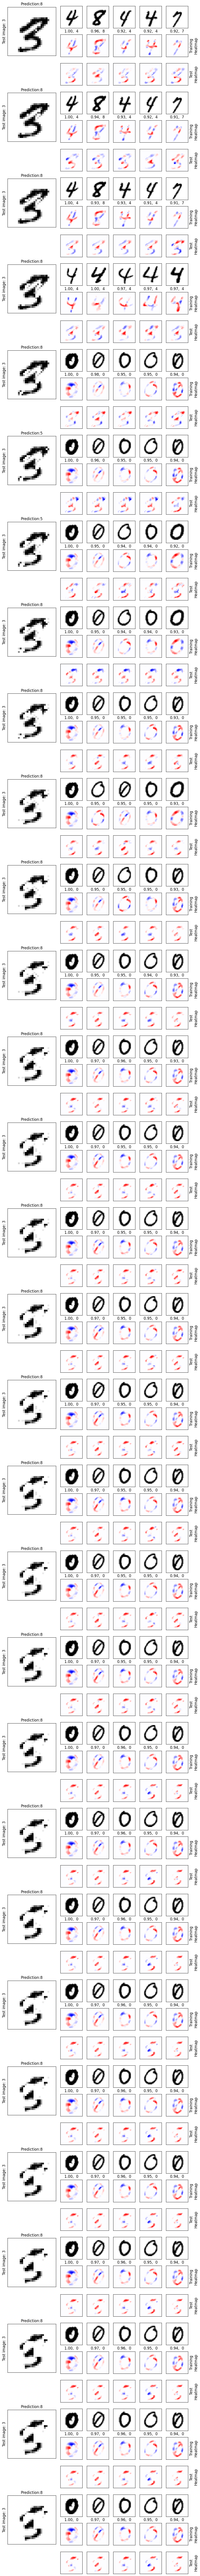

In [31]:
import importlib
importlib.reload(feature_attribution_testing)

xpl_root_pixelflip="C:/Users/weckbecker/DualView/explanations/MNIST/pixelflip/basic_conv_std/representer_rev"

out = feature_attribution_testing.evaluate_with_given_train_test(model_name=model_name,
             model_path=model_path,
             device=device,
             class_groups=class_groups,
             dataset_name=dataset_name,
             dataset_type=dataset_type,
             data_root=data_root,
             xpl_root=xpl_root_pixelflip,
             #coef_root=train_config.get('coef_root', None),
             save_dir=save_dir,
             validation_size=validation_size,
             num_classes=num_classes,
             imagenet_class_ids=imagenet_class_ids,
             testsplit=testsplit,
             pages=pages,
             train=train,
             test=pixelturnoff_rev_ds
             )

100%|██████████| 1/1 [00:00<00:00, 51.76it/s]

torch.Size([30, 60000])
30
torch.Size([30, 60000])


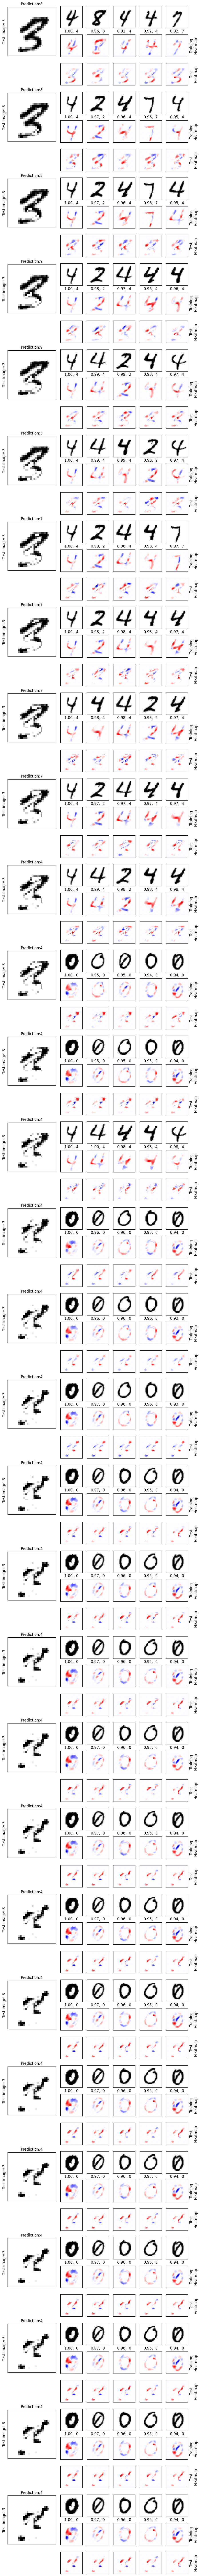

In [32]:
xpl_root_pixelflip="C:/Users/weckbecker/DualView/explanations/MNIST/pixelflip/basic_conv_std/representer"

out = feature_attribution_testing.evaluate_with_given_train_test(model_name=model_name,
             model_path=model_path,
             device=device,
             class_groups=class_groups,
             dataset_name=dataset_name,
             dataset_type=dataset_type,
             data_root=data_root,
             xpl_root=xpl_root_pixelflip,
             #coef_root=train_config.get('coef_root', None),
             save_dir=save_dir,
             validation_size=validation_size,
             num_classes=num_classes,
             imagenet_class_ids=imagenet_class_ids,
             testsplit=testsplit,
             pages=pages,
             train=train,
             test=pixelturnoff_ds
             )